In [1]:
!git clone https://github.com/geneexpressionpolito/Transformers-for-gene-expression-prediction-from-raw-dna-sequences.git
!mv ./Transformers-for-gene-expression-prediction-from-raw-dna-sequences/Classes ./
!pip install import-ipynb
!gdown --folder 1u34ntvh4dL5Y5_hZSA9EDs5SZ32MPda1
import import_ipynb
import os

Mounted at /content/drive


In [4]:
from Classes.DataManager import DataManager
from Classes.Transformer import projTransformer
from tensorflow import keras
import numpy as np

%load_ext tensorboard

importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/DataManager.ipynb
importing Jupyter notebook from /content/drive/.shortcut-targets-by-id/1he9S1Es-XalZ9vgCRMbTTNd6cXeRkkFI/Bionformatics_Project/Colab/Classes/Transformer.ipynb
Populating the interactive namespace from numpy and matplotlib
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [5]:
print("> Loading DataManager...")
dm = DataManager(DeepLncLoc = True, tf=True)

print("> Loading train data...")
X_trainhalflife, X_trainpromoter, y_train, X_traintf                = dm.get_train()

print("> Loading validation data...")
X_validationhalflife, X_validationpromoter, y_validation, X_validtf = dm.get_validation()

print("> Loading test data...")
X_testhalflife, X_testpromoter, y_test, X_testtf                   = dm.get_test()

print("\n**************\n     DONE\n**************\n")

> Loading DataManager...
> Loading train data...
> Loading validation data...
> Loading test data...

**************
     DONE
**************



data loading takes at most 30s, we can improve it saving the numerical representation of sequences

Preprocessing-> Padding

In [6]:

print(X_trainpromoter.shape)
print(X_validationpromoter.shape)
print(X_testpromoter.shape)

maxlen=X_trainpromoter.shape[1]
print(maxlen)

(15453, 210, 64)
(1000, 210, 64)
(999, 210, 64)
210


INFO:tensorflow:Initializing the TPU system: grpc://10.72.42.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.72.42.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


model built
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 210, 64)]    0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 210, 64)      256         input_1[0][0]                    
__________________________________________________________________________________________________
position_encoding2 (PositionEnc (None, 210, 64)      0           batch_normalization[0][0]        
__________________________________________________________________________________________________
transformer_block (TransformerB (None, 210, 64)      116224      position_encoding2[0][0]         
__________________________________________________________________________________

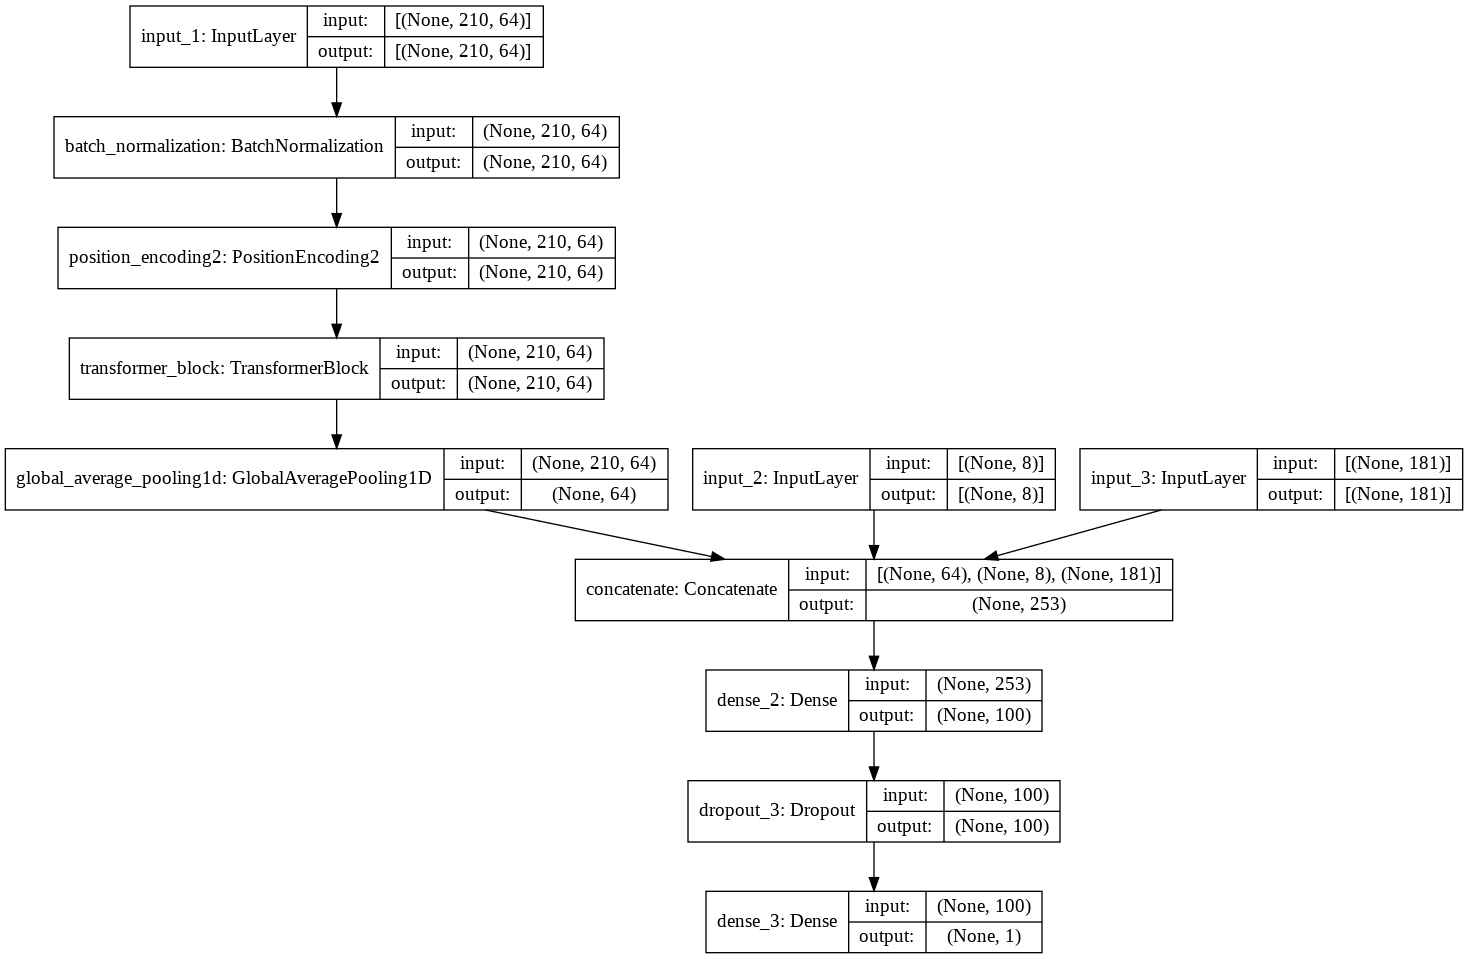


Parameters:
{'checkpoint_dir': 'DeepLncLoc_transformer_TPU/', 'model_type': 'DeepLncLoc_TF', 'n_epochs': 300, 'batch_size': 256, 'learning_rate': 0.0005, 'momentum': 0.9, 'maxlen': 210, 'embed_dim': 64, 'num_heads': 4, 'ff_dim': 384, 'vocab_size': 5, 'dense': 100, 'dropout_rate': 0.1, 'lr_reduction_epoch': None, 't_rate': 0.1, 'patience': 20, 'optimizer': 'Adam', 'warmup_steps': 4000, 'shuffle': True, 'logdir': None, 'loss': 'mse', 'history': '', 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f923ae12e50>}



In [7]:
# # Clear any logs from previous runs
# !rm -rf ./logs/transformer_new_embedding_0-002/

model_type="DeepLncLoc_TF"
logdir = None
checkpoint_dir = "DeepLncLoc_transformer_TPU/"
loss = "mse"

######################################################################################################################
import tensorflow as tf
tf.keras.backend.clear_session()

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.experimental.TPUStrategy(resolver)


with strategy.scope():
    net = projTransformer(checkpoint_dir=checkpoint_dir, model_type=model_type, n_epochs=300, batch_size=256, 
                      learning_rate=5e-4, lr_reduction_epoch=None, maxlen=maxlen, embed_dim=64, num_heads=4, ff_dim=384, dense=100, 
                      dropout_rate=0.1, logdir=logdir, optimizer="Adam", warmup_steps=4_000, patience=20)
    
########################################################################################################################


Epoch 1/300
61/61 [==============================] - 14s 114ms/step - loss: 0.4797 - val_loss: 0.3323
Epoch 2/300
61/61 [==============================] - 2s 26ms/step - loss: 0.3493 - val_loss: 0.3192
Epoch 3/300
61/61 [==============================] - 1s 24ms/step - loss: 0.3178 - val_loss: 0.3696
Epoch 4/300
61/61 [==============================] - 1s 24ms/step - loss: 0.2974 - val_loss: 0.3771
Epoch 5/300
61/61 [==============================] - 2s 25ms/step - loss: 0.2883 - val_loss: 0.3926
Epoch 6/300
61/61 [==============================] - 1s 24ms/step - loss: 0.2800 - val_loss: 0.3114
Epoch 7/300
61/61 [==============================] - 1s 23ms/step - loss: 0.2716 - val_loss: 0.3366
Epoch 8/300
61/61 [==============================] - 2s 25ms/step - loss: 0.2663 - val_loss: 0.3025
Epoch 9/300
61/61 [==============================] - 1s 25ms/step - loss: 0.2612 - val_loss: 0.3166
Epoch 10/300
61/61 [==============================] - 1s 24ms/step - loss: 0.2600 - val_loss: 0.28

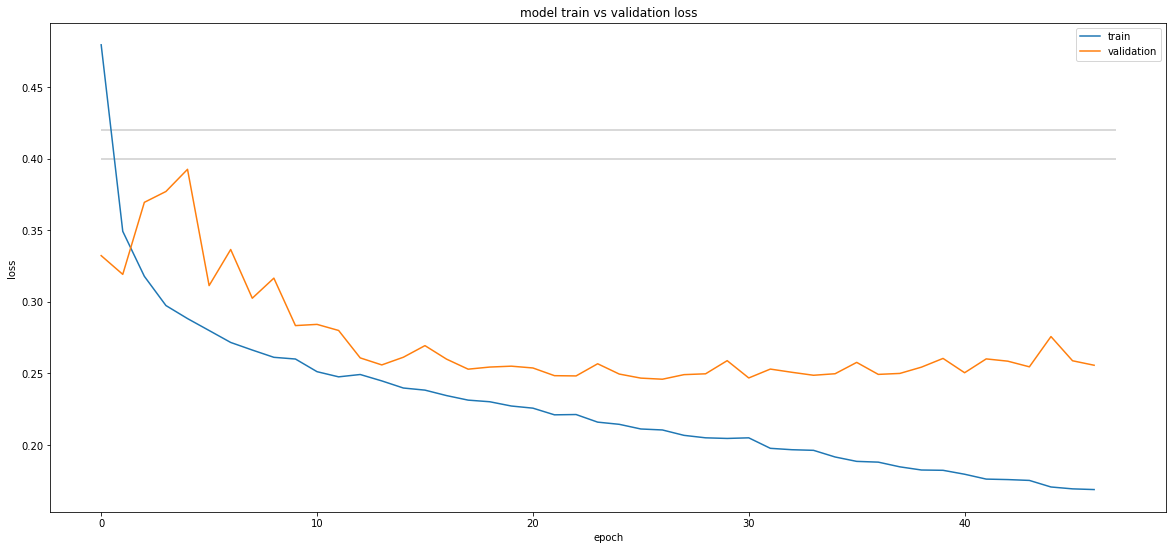

In [8]:
net.train_model([X_trainpromoter, X_trainhalflife, X_traintf], y_train, [X_validationpromoter, X_validationhalflife, X_validtf], y_validation, True)

In [9]:
net.evaluate([X_testpromoter, X_testhalflife, X_testtf], y_test)

Test R^2 = 0.772


In [10]:
net.evaluate_best([X_testpromoter, X_testhalflife, X_testtf], y_test, True)

Test R^2 = 0.772


0.7719982050253625

In [11]:
# net.plot_train()

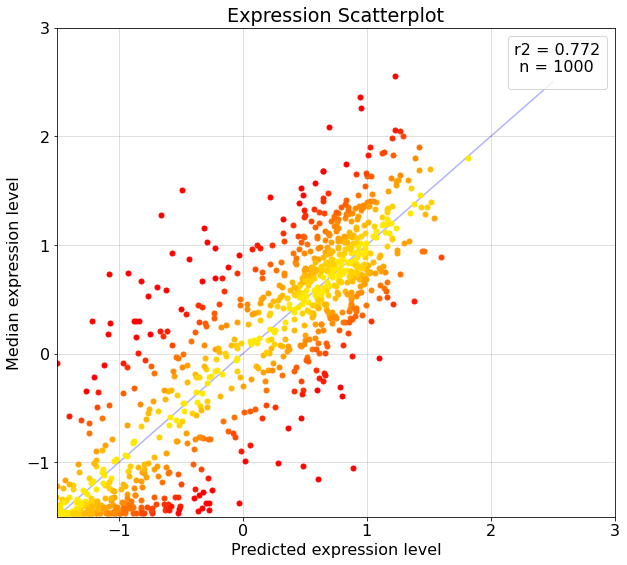

In [12]:
net.plot_r2([X_testpromoter, X_testhalflife, X_testtf], y_test, True)

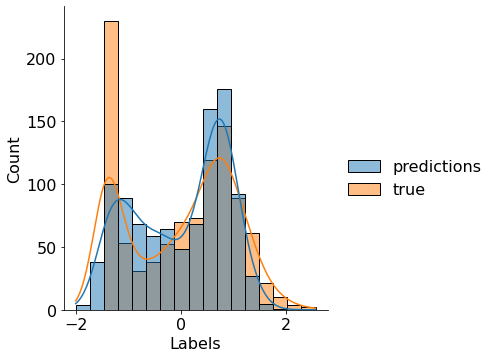

In [13]:
net.plot_kde([X_testpromoter, X_testhalflife, X_testtf], y_test, True)